<div class="alert alert-warning" role="alert">
    This notebook is meant for instructors to create synthetic data for the non-linear inversion examples. Do not change the code below.
</div>

## Settings

In [1]:
depth = 1500 # Depth of anomaly in meters
dRho = 1000 # Density contrast in kg/m^3
length = 10000 # Profile length in meters
radius = 300 # Radius of anomaly in meters
n = 101 # Number of equidistant observation points along the profile (odd number preferred for vizualization at x=0)
noise = 0.01 # error in mGal (0.01 is typical device accuracy of LaCoste & Romberg gravimeter)

## Calculation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Gravity anomaly (mGal)')

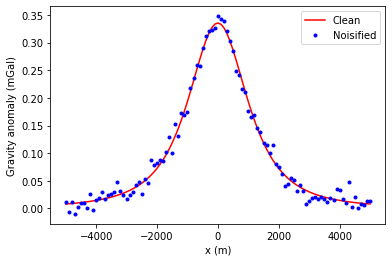

In [3]:
G = 6.6743e-11 # gravitational constant
x = np.linspace(-length//2, length//2, n)

def grav(R, z, density):
    """Formula from the exercise sheet as a function for later reuse."""
    gz = 4/3 * np.pi * R**3 * density * G * z / (x**2 + z**2)**(3/2)
    gz *= 1e5 # unit conversion
    return gz

gz = grav(radius, depth, dRho)
gz_noise = gz + np.random.normal(scale=noise, size=n)

plt.plot(x, gz, "r-", label="Clean")
plt.plot(x, gz_noise, "b.", label="Noisified")
plt.legend()

plt.xlabel("x (m)")
plt.ylabel("Gravity anomaly (mGal)")

## Export

In [12]:
import pandas as pd
data = pd.DataFrame(data=np.column_stack([x, gz_noise]), columns=["x (m)", "g_z (mGal)"])

In [14]:
data.to_csv("data/grav.csv", index=False)